In [15]:
using StatsBase
using FFTW
using Plots
using Images
using Colors
using FileIO
using ImageCore

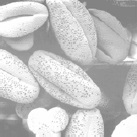

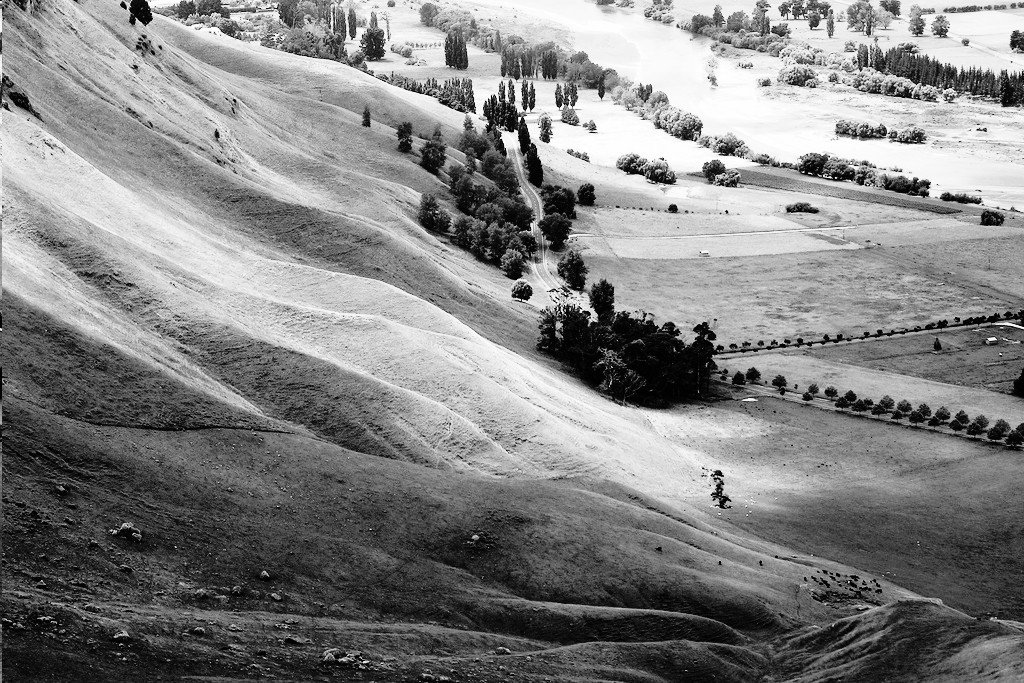

In [92]:
origin_img = load("../images/histogram.jpg")
prefered_img = load("../images/prefered_histogram.jpg")
display(origin_img)
display(prefered_img)

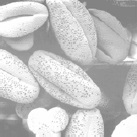

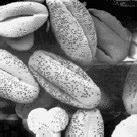

In [119]:
origin_img_256 = round.(Int32, Float32.(Gray.(origin_img)) .* 255)
prefered_img_256 = round.(Int32, Float32.(Gray.(prefered_img)) .* 255)

function create_cdf(arr)
    hist = zeros(256)
    for val in arr
       hist[val + 1] += 1
    end
    cdf = cumsum(hist)
    cdf ./= length(arr)
    cdf, hist
end

origin_cdf, origin_hist = create_cdf(origin_img_256)
prefered_cdf, prefered_hist = create_cdf(prefered_img_256)

mapping = zeros(256)
for i in 1:256
    idx = argmin(abs.(prefered_cdf .- origin_cdf[i]))
    mapping[i] = idx - 1
end

# display(mapping)

out_img = similar(origin_img_256)
for idx in CartesianIndices(out_img)
    old_color = origin_img_256[idx]
    new_color = mapping[old_color]
    out_img[idx] = new_color
end

new_img = Gray.(out_img ./ 255)
new_cdf, new_hist = create_cdf(out_img)

display(origin_img)
display(new_img)

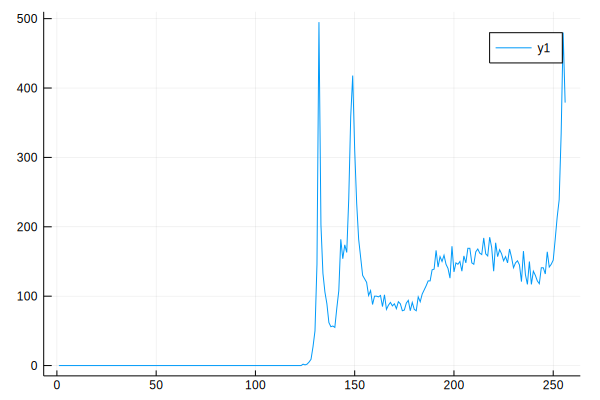

In [116]:
plot(origin_hist)

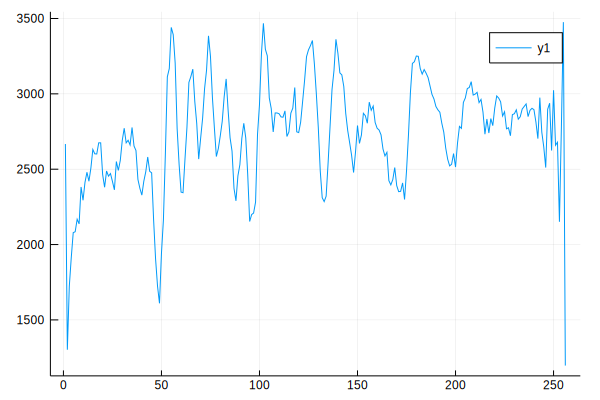

In [117]:
plot(prefered_hist)

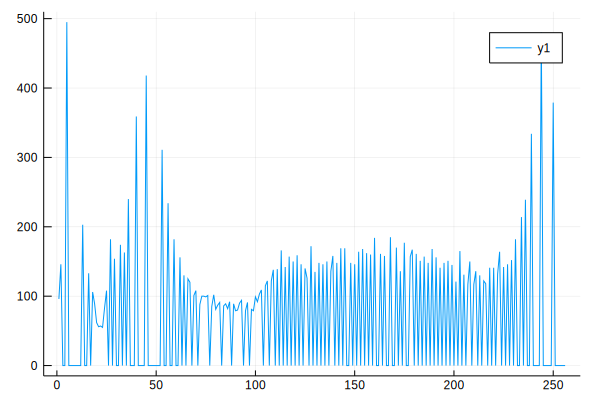

In [118]:
plot(new_hist)